In [65]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc

In [66]:
start = datetime.datetime(2012,4,6)
end = datetime.datetime(2022,4,6)

In [67]:
stock = yf.download('AAPL',start,end)

[*********************100%***********************]  1 of 1 completed


In [68]:
stock_index = stock.reset_index()

In [69]:
stock_index.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-04-09,22.361786,22.851429,22.332144,22.722500,19.456692,597536800
1,2012-04-10,22.854643,23.000000,22.357143,22.444286,19.218468,889725200
2,2012-04-11,22.721430,22.745358,22.262142,22.364286,19.149965,696614800
3,2012-04-12,22.321428,22.547501,22.160713,22.241785,19.045071,614336800
4,2012-04-13,22.289642,22.310715,21.553928,21.615356,18.508669,859644800


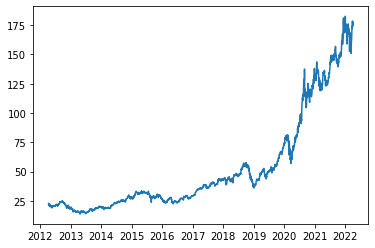

In [70]:
acc = plt.plot(stock_index["Date"],stock_index["Open"])
#plt.plot(stock["Date"],stock["Close"])

In [3]:
import numpy as np

In [7]:
class SVM_classifier():
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_paramter = lambda_parameter
        
    def fit(self,X,Y):
        self.m, self.n = X.shape
        self.w = np.zeroes(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
            
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self):
        
        y_label = np.where(self.Y <= 0, -1, 1)
        
        for index, x_i in enumerate(self.X):
            
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
            
            if (condition == True):
                
                dw = 2* self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = 0
                
            else:
                dw = 2* self.lambda_parameter * self.w
                db = y_label[index]
            
            
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db
            
    def predict(self, X):

        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        return y_hat   